<a href="https://colab.research.google.com/github/farahboual/Tomato_disease/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/datasets/train'
valid_path = '/content/drive/MyDrive/datasets/valid'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
# useful for getting number of output classes
import glob
folders = glob.glob('/content/drive/MyDrive/datasets/train/*')
folders

['/content/drive/MyDrive/datasets/train/Tomato___Late_blight',
 '/content/drive/MyDrive/datasets/train/Tomato___Early_blight',
 '/content/drive/MyDrive/datasets/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/datasets/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/datasets/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/datasets/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/datasets/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/datasets/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/datasets/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/datasets/train/Tomato___healthy']

In [9]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,314,794 (85.12 MB)

 Trainable params: 512,010 (1.95 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/datasets/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4588 images belonging to 10 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1147/1147 ━━━━━━━━━━━━━━━━━━━━ 4907s 4s/step - accuracy: 0.5905 - loss: 5.4811 - val_accuracy: 0.7389 - val_loss: 4.8064
Epoch 2/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 3238s 3s/step - accuracy: 0.7844 - loss: 3.4077 - val_accuracy: 0.7986 - val_loss: 3.4433
Epoch 4/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 3178s 3s/step - accuracy: 0.8184 - loss: 3.2668 - val_accuracy: 0.8158 - val_loss: 3.5012
Epoch 6/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 3225s 3s/step - accuracy: 0.8431 - loss: 2.8368 - val_accuracy: 0.7801 - val_loss: 5.7170
Epoch 8/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 3235s 3s/step - accuracy: 0.8547 - loss: 2.8684 - val_accuracy: 0.8326 - val_loss: 3.8114
Epoch 10/10
1147/1147 ━━━━━━━━━━━━━━━━━━━━ 0s 108us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


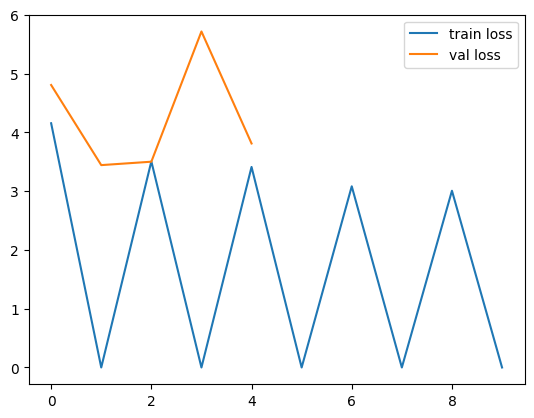

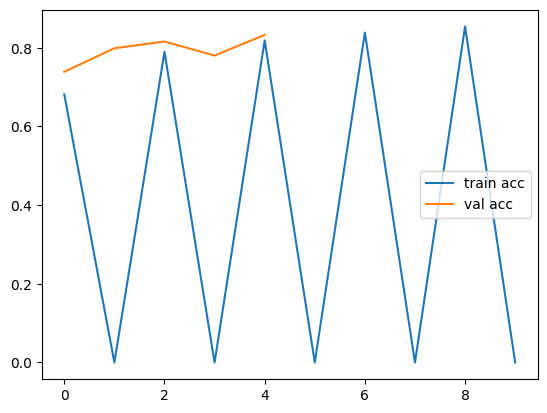

<Figure size 640x480 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [19]:
y_pred = model.predict(test_set)
y_pred

144/144 ━━━━━━━━━━━━━━━━━━━━ 607s 4s/step


array([[7.3322004e-33, 2.3600544e-26, 6.6012252e-14, ..., 0.0000000e+00,
        0.0000000e+00, 6.3902614e-25],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [6.4159396e-19, 1.8644567e-13, 9.6106304e-13, ..., 1.9093693e-25,
        4.8476685e-32, 0.0000000e+00],
       [1.0000000e+00, 5.0207293e-22, 0.0000000e+00, ..., 4.5023454e-34,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([6, 6, 5, ..., 3, 0, 8])

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_inception.h5')

In [27]:
img=image.load_img('/00b7e89a-e129-4576-b51f-48923888bff9___GCREC_Bact.Sp 6202.JPG',target_size=(224,224))

In [28]:
x=image.img_to_array(img)
x

array([[[113., 107., 107.],
        [114., 108., 108.],
        [134., 128., 128.],
        ...,
        [139., 133., 133.],
        [130., 124., 124.],
        [120., 114., 114.]],

       [[124., 118., 118.],
        [135., 129., 129.],
        [145., 139., 139.],
        ...,
        [125., 119., 119.],
        [135., 129., 129.],
        [151., 145., 145.]],

       [[137., 131., 131.],
        [143., 137., 137.],
        [146., 140., 140.],
        ...,
        [116., 110., 110.],
        [113., 107., 107.],
        [128., 122., 122.]],

       ...,

       [[145., 143., 146.],
        [146., 144., 147.],
        [147., 145., 148.],
        ...,
        [160., 158., 159.],
        [161., 159., 160.],
        [161., 159., 160.]],

       [[145., 143., 146.],
        [146., 144., 147.],
        [147., 145., 148.],
        ...,
        [161., 159., 160.],
        [160., 158., 159.],
        [160., 158., 159.]],

       [[147., 145., 148.],
        [149., 147., 150.],
        [149., 1

In [29]:
x.shape

(224, 224, 3)

In [30]:
x=x/255

In [31]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [32]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[1.4641805e-19, 4.2408166e-10, 9.9999964e-01, 5.9357734e-16,
        3.4055238e-11, 8.3395942e-20, 2.8365778e-15, 3.2013303e-22,
        3.1854665e-07, 4.2922579e-16]], dtype=float32)

In [33]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [34]:
a==1

array([False])

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.17.1'